In [17]:

import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D


import database_reader
from database_reader import offline_df

def create_graph_for_game_id_and_team(game_id, highlighted_team_name):
    data = offline_df.loc[(game_id,), :]
    last_50_offline_games_avg_by_round = offline_df.loc[list(offline_df.groupby('game_id').groups.keys())[-50:]].loc[:,'round_1':'round_7'].mean()
    all_scores = data.loc[:, 'round_1':'round_7']

    num_teams = 8
    bar_width = 8 / num_teams

    f = plt.figure(figsize=(15,15))

    for rnd in range(1, 8):
        plt.subplot(4, 3, rnd)

        round_name = f"round_{rnd}"

        plt.title(f"Раунд {rnd}")

        for place, row in data.loc[:num_teams].iterrows():
            avg, color = database_reader.color_by_rarity(row['team_name'])
            team_name = f"{place}. {row['team_name']} ({'x̄ = ' + str(avg) if avg is not None else '-'})"
            hatch = '//' if row['team_name'] == highlighted_team_name else None
            score = row.loc[round_name]
            plt.bar(place * bar_width, score, width=bar_width, color=color, hatch=hatch, alpha=0.7, label=team_name, edgecolor='black', linewidth=1)

        plt.hlines(all_scores.loc[:][round_name].mean(), 0.5, 0.5 + num_teams, colors='black', linestyles='dashed', alpha=0.7, label='Средний балл всех команд за соответствующий раунд',path_effects=[pe.Stroke(linewidth=2, foreground='w'), pe.Normal()])
        plt.hlines(last_50_offline_games_avg_by_round.loc[round_name], 0.5, 0.5 + num_teams, colors='gray', linestyles='-.', alpha=0.7, label='Средний балл за соответствующий раунд за последние 50 игр', path_effects=[pe.Stroke(linewidth=2, foreground='w'), pe.Normal()])
        plt.xlabel('Место')
        plt.ylabel('Количество очков')
        plt.xticks(np.arange(1, num_teams + 1, step=1), np.arange(1, num_teams + 1, step=1))

    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='#ff222b', markeredgecolor='black', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='#ff9e0f', markeredgecolor='black', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='#55c8ff', markeredgecolor='black', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='#72e240', markeredgecolor='black', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='#bebebe', markeredgecolor='black', markersize=10)
                       ]
    rarity_legend = plt.legend(legend_elements, ["Legendary team", "Epic team", "Rare team", "Uncommon team", "Common team"], loc='lower center', bbox_to_anchor=(3.2, 0.2), fancybox=True, shadow=True)
    plt.legend(loc='lower center', bbox_to_anchor=(2.0, 0.2), fancybox=True, shadow=True)
    plt.gca().add_artist(rarity_legend)

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


    return f



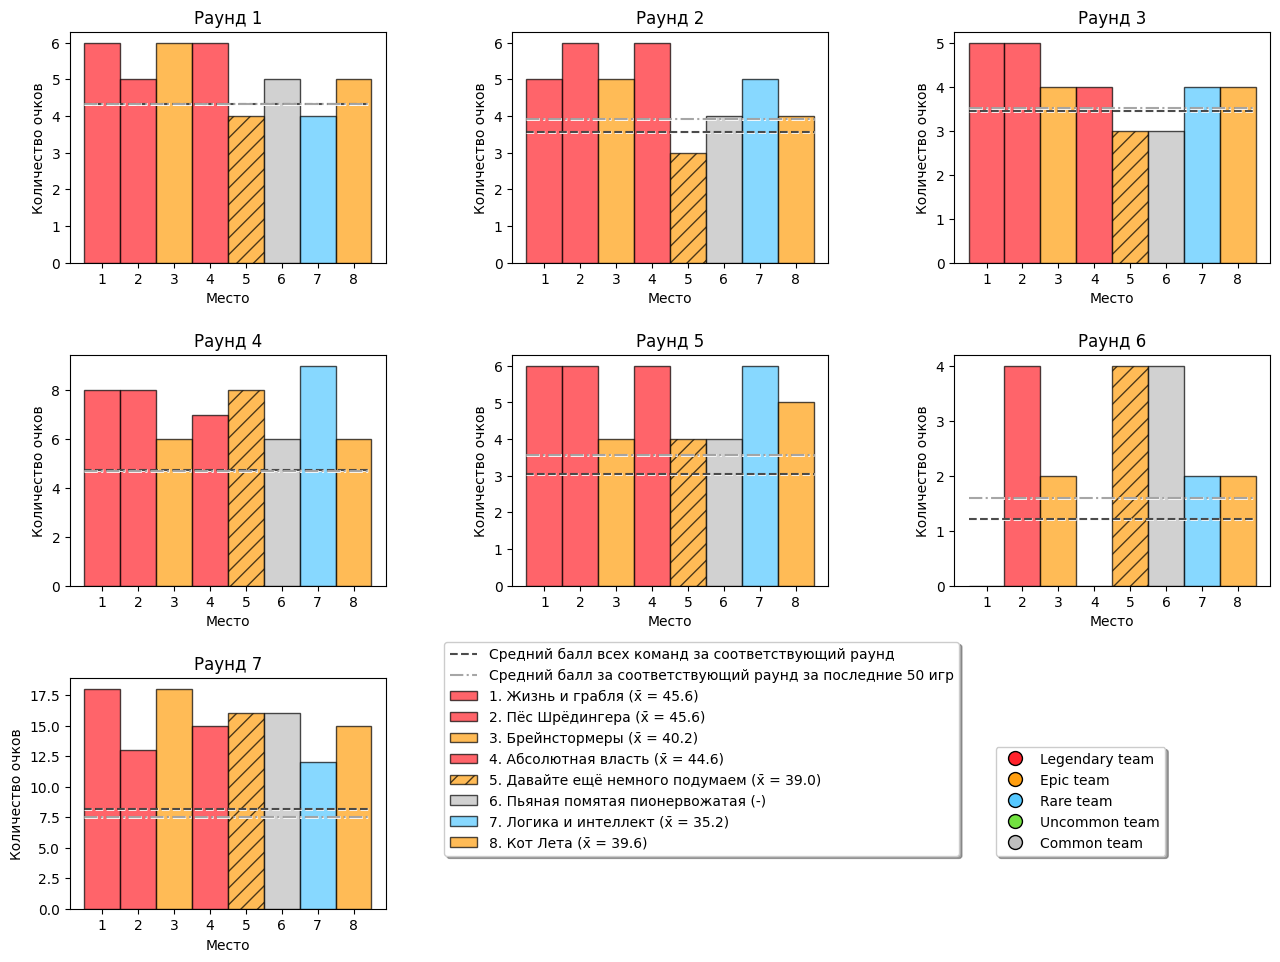

In [18]:
_ = create_graph_for_game_id_and_team(54311, 'Давайте ещё немного подумаем')